In [83]:
# Librerías

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import pickle
import joblib

from sklearn import linear_model
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

from imblearn.over_sampling import SMOTE

## DIAMOND TEST

In [84]:
# CSV diamonds_test
df_Diamond_test=pd.read_csv('./diamonds_test.csv')
df_Diamond_test

,id,carat,cut,color,clarity,depth,table,x,y,z,city
0,0,0.79,Very Good,F,SI1,62.7,60.0,5.82,5.89,3.67,Amsterdam
1,1,1.20,Ideal,J,VS1,61.0,57.0,6.81,6.89,4.18,Surat
2,2,1.57,Premium,H,SI1,62.2,61.0,7.38,7.32,4.57,Kimberly
3,3,0.90,Very Good,F,SI1,63.8,54.0,6.09,6.13,3.90,Kimberly
4,4,0.50,Very Good,F,VS1,62.9,58.0,5.05,5.09,3.19,Amsterdam
...,...,...,...,...,...,...,...,...,...,...,...
13480,13480,0.57,Ideal,E,SI1,61.9,56.0,5.35,5.32,3.30,Amsterdam
13481,13481,0.71,Ideal,I,VS2,62.2,55.0,5.71,5.73,3.56,New York City
13482,13482,0.70,Ideal,F,VS1,61.6,55.0,5.75,5.71,3.53,Tel Aviv
13483,13483,0.70,Very Good,F,SI2,58.8,57.0,5.85,5.89,3.45,Surat


In [85]:
df_Diamond_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13485 entries, 0 to 13484
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       13485 non-null  int64  
 1   carat    13485 non-null  float64
 2   cut      13485 non-null  object 
 3   color    13485 non-null  object 
 4   clarity  13485 non-null  object 
 5   depth    13485 non-null  float64
 6   table    13485 non-null  float64
 7   x        13485 non-null  float64
 8   y        13485 non-null  float64
 9   z        13485 non-null  float64
 10  city     13485 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.1+ MB


In [86]:
# One hot encoding
cat_cols = ['color', 'clarity', 'city', 'cut']
df_Diamond_test = pd.get_dummies(df_Diamond_test, columns=cat_cols, drop_first=True)
df_Diamond_test


,id,carat,depth,table,x,y,z,color_E,color_F,color_G,...,city_Madrid,city_New York City,city_Paris,city_Surat,city_Tel Aviv,city_Zurich,cut_Good,cut_Ideal,cut_Premium,cut_Very Good
0,0,0.79,62.7,60.0,5.82,5.89,3.67,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,1,1.20,61.0,57.0,6.81,6.89,4.18,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2,2,1.57,62.2,61.0,7.38,7.32,4.57,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,3,0.90,63.8,54.0,6.09,6.13,3.90,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,4,0.50,62.9,58.0,5.05,5.09,3.19,0,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13480,13480,0.57,61.9,56.0,5.35,5.32,3.30,1,0,0,...,0,0,0,0,0,0,0,1,0,0
13481,13481,0.71,62.2,55.0,5.71,5.73,3.56,0,0,0,...,0,1,0,0,0,0,0,1,0,0
13482,13482,0.70,61.6,55.0,5.75,5.71,3.53,0,1,0,...,0,0,0,0,1,0,0,1,0,0
13483,13483,0.70,58.8,57.0,5.85,5.89,3.45,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [87]:
# Scaling

#scaler = StandardScaler()
#scaled_data = scaler.fit_transform(df_Diamond_test)
#scaled_data

# Train and Predict test

In [88]:
%%time

# Train the model and make predictions

#regressor = LinearRegression()
regressor = RandomForestRegressor()
hyperparameters = regressor.get_params()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

print('Model:', regressor, '\n')
print('Model hyperparameters:', hyperparameters, '\n')
#print('Model coefficients:', regressor.coef_, '\n')
#print('Model feature importance:', regressor.feature_importances_)
print('Ground truth target:', y_test, '\n')
print('Predicted target:', y_pred, '\n')
# dependiendo del modelo que utilices, cambia el resultado(random forest o regresion linea). El mejor modelo, RandomForest

Model: RandomForestRegressor() 

Model hyperparameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False} 

Ground truth target: [ 270.39080404  120.34102476  449.52085777 -180.06562862  157.15138306
 -133.05176281  163.7141322   -96.93023165  327.62837842  270.17583349
  344.46994391  187.86891753   14.61811042 -101.9689925    77.97533234
  297.60507099  -32.67098993  343.75320838  244.92148713   29.03235182
 -160.57884669  -48.68807244  132.62555633  155.06035163  372.48921709
  431.42160405  143.77130735  322.81483606   49.70723517 -518.01749379
  -44.20600644  188.77670904  164.80262267 -112.85537525   98.67596295
  370.58063198  200.88467971  153.45690607 -333

In [95]:
%%time

# Model training

regressor.fit(X_train, y_train)

print('Model:', regressor, '\n')
print('Model hyperparameters:', hyperparameters, '\n')
#print('Model coefficients:', regressor.coef_, '\n')

Model: RandomForestRegressor() 

Model hyperparameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False} 

CPU times: total: 1.89 s
Wall time: 1.92 s


In [96]:
#%%time

#Model predictions

predictions = regressor.predict(df_Diamond_test)

print(type(predictions))

<class 'numpy.ndarray'>


C:\Users\abarr\miniconda3\envs\M3_ih\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [97]:
df_predictions = pd.DataFrame(y_pred, columns=['price']).reset_index()
df_predictions
#df.columns = ['new_col1', 'new_col2', 'new_col3', 'new_col4']

,index,price
0,0,134.704342
1,1,130.015885
2,2,295.943152
3,3,-119.836346
4,4,75.416483
...,...,...
195,195,-69.320905
196,196,-191.962765
197,197,122.038723
198,198,-31.360632


In [98]:

df_predictions['id']=df_predictions.index
df_predictions

,index,price,id
0,0,134.704342,0
1,1,130.015885,1
2,2,295.943152,2
3,3,-119.836346,3
4,4,75.416483,4
...,...,...,...
195,195,-69.320905,195
196,196,-191.962765,196
197,197,122.038723,197
198,198,-31.360632,198


In [66]:
df_predictions_d=df_predictions.drop('index', axis=1)
df_predictions_d

,price,id
0,146.831266,0
1,154.204955,1
2,305.191670,2
3,-114.964380,3
4,75.672839,4
...,...,...
195,-87.644931,195
196,-180.977966,196
197,92.317668,197
198,-23.968171,198


In [67]:
df_predictions_d.to_csv('train.csv', index=False)

In [68]:
## Nota Kaggle
#5288 (Random)

## DIAMOND TRAIN

In [99]:
# CSV EDA
df_train=pd.read_csv('competi_kaggle.csv')
df_train
 



,index_id,depth,table,x,y,z,color,clarity,city,cut,carat,price
0,5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91...,62.4,58.0,6.83,6.79,4.25,J,VS2,Kimberly,Premium,1.21,4268
1,6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...,63.0,57.0,4.35,4.38,2.75,H,VS2,Antwerp,Very Good,0.32,505
2,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,65.5,55.0,5.62,5.53,3.65,G,VS1,London,Fair,0.71,2686
3,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,63.8,56.0,4.68,4.72,3.00,D,SI1,New York City,Good,0.41,738
4,4b227777d4dd1fc61c6f884f48641d02b4d121d3fd328c...,60.5,59.0,6.55,6.51,3.95,G,SI1,Dubai,Ideal,1.02,4882
...,...,...,...,...,...,...,...,...,...,...,...,...
40450,f0bc79169405ebeb24e308055156b946ffd819db9b4f75...,62.7,57.0,7.10,7.04,4.43,G,VS1,New York City,Ideal,1.34,10070
40451,339916a23bf22b052b54cb2a9b36ee8418c1c68b46acad...,57.1,60.0,8.31,8.25,4.73,F,SI2,Zurich,Good,2.02,12615
40452,46957922b99954654c1deb8d854c3f069bf118b2ce9415...,62.7,56.0,6.37,6.42,4.01,H,SI1,Tel Aviv,Ideal,1.01,5457
40453,9d733392d362d5c6f1d9b9659b601c7d4b5a1c1c8df579...,61.9,54.3,4.45,4.47,2.76,J,VS1,Paris,Ideal,0.33,456


In [100]:
x=df_train.drop('index_id', axis=1)
x

,depth,table,x,y,z,color,clarity,city,cut,carat,price
0,62.4,58.0,6.83,6.79,4.25,J,VS2,Kimberly,Premium,1.21,4268
1,63.0,57.0,4.35,4.38,2.75,H,VS2,Antwerp,Very Good,0.32,505
2,65.5,55.0,5.62,5.53,3.65,G,VS1,London,Fair,0.71,2686
3,63.8,56.0,4.68,4.72,3.00,D,SI1,New York City,Good,0.41,738
4,60.5,59.0,6.55,6.51,3.95,G,SI1,Dubai,Ideal,1.02,4882
...,...,...,...,...,...,...,...,...,...,...,...
40450,62.7,57.0,7.10,7.04,4.43,G,VS1,New York City,Ideal,1.34,10070
40451,57.1,60.0,8.31,8.25,4.73,F,SI2,Zurich,Good,2.02,12615
40452,62.7,56.0,6.37,6.42,4.01,H,SI1,Tel Aviv,Ideal,1.01,5457
40453,61.9,54.3,4.45,4.47,2.76,J,VS1,Paris,Ideal,0.33,456


In [101]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index_id  40455 non-null  object 
 1   depth     40455 non-null  float64
 2   table     40455 non-null  float64
 3   x         40455 non-null  float64
 4   y         40455 non-null  float64
 5   z         40455 non-null  float64
 6   color     40455 non-null  object 
 7   clarity   40455 non-null  object 
 8   city      40455 non-null  object 
 9   cut       40455 non-null  object 
 10  carat     40455 non-null  float64
 11  price     40455 non-null  int64  
dtypes: float64(6), int64(1), object(5)
memory usage: 3.7+ MB


In [102]:
# One hot encoding
cat_cols = ['color', 'clarity', 'city', 'cut']
df_train= pd.get_dummies(df_train, columns=cat_cols, drop_first=True)
df_train

,index_id,depth,table,x,y,z,carat,price,color_E,color_F,...,city_Madrid,city_New York City,city_Paris,city_Surat,city_Tel Aviv,city_Zurich,cut_Good,cut_Ideal,cut_Premium,cut_Very Good
0,5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91...,62.4,58.0,6.83,6.79,4.25,1.21,4268,0,0,...,0,0,0,0,0,0,0,0,1,0
1,6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...,63.0,57.0,4.35,4.38,2.75,0.32,505,0,0,...,0,0,0,0,0,0,0,0,0,1
2,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,65.5,55.0,5.62,5.53,3.65,0.71,2686,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,63.8,56.0,4.68,4.72,3.00,0.41,738,0,0,...,0,1,0,0,0,0,1,0,0,0
4,4b227777d4dd1fc61c6f884f48641d02b4d121d3fd328c...,60.5,59.0,6.55,6.51,3.95,1.02,4882,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40450,f0bc79169405ebeb24e308055156b946ffd819db9b4f75...,62.7,57.0,7.10,7.04,4.43,1.34,10070,0,0,...,0,1,0,0,0,0,0,1,0,0
40451,339916a23bf22b052b54cb2a9b36ee8418c1c68b46acad...,57.1,60.0,8.31,8.25,4.73,2.02,12615,0,1,...,0,0,0,0,0,1,1,0,0,0
40452,46957922b99954654c1deb8d854c3f069bf118b2ce9415...,62.7,56.0,6.37,6.42,4.01,1.01,5457,0,0,...,0,0,0,0,1,0,0,1,0,0
40453,9d733392d362d5c6f1d9b9659b601c7d4b5a1c1c8df579...,61.9,54.3,4.45,4.47,2.76,0.33,456,0,0,...,0,0,1,0,0,0,0,1,0,0


In [103]:
df_train=df_train.drop('index_id', axis=1)
df_train

,depth,table,x,y,z,carat,price,color_E,color_F,color_G,...,city_Madrid,city_New York City,city_Paris,city_Surat,city_Tel Aviv,city_Zurich,cut_Good,cut_Ideal,cut_Premium,cut_Very Good
0,62.4,58.0,6.83,6.79,4.25,1.21,4268,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,63.0,57.0,4.35,4.38,2.75,0.32,505,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,65.5,55.0,5.62,5.53,3.65,0.71,2686,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,63.8,56.0,4.68,4.72,3.00,0.41,738,0,0,0,...,0,1,0,0,0,0,1,0,0,0
4,60.5,59.0,6.55,6.51,3.95,1.02,4882,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40450,62.7,57.0,7.10,7.04,4.43,1.34,10070,0,0,1,...,0,1,0,0,0,0,0,1,0,0
40451,57.1,60.0,8.31,8.25,4.73,2.02,12615,0,1,0,...,0,0,0,0,0,1,1,0,0,0
40452,62.7,56.0,6.37,6.42,4.01,1.01,5457,0,0,0,...,0,0,0,0,1,0,0,1,0,0
40453,61.9,54.3,4.45,4.47,2.76,0.33,456,0,0,0,...,0,0,1,0,0,0,0,1,0,0


In [104]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 36 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   depth               40455 non-null  float64
 1   table               40455 non-null  float64
 2   x                   40455 non-null  float64
 3   y                   40455 non-null  float64
 4   z                   40455 non-null  float64
 5   carat               40455 non-null  float64
 6   price               40455 non-null  int64  
 7   color_E             40455 non-null  uint8  
 8   color_F             40455 non-null  uint8  
 9   color_G             40455 non-null  uint8  
 10  color_H             40455 non-null  uint8  
 11  color_I             40455 non-null  uint8  
 12  color_J             40455 non-null  uint8  
 13  clarity_IF          40455 non-null  uint8  
 14  clarity_SI1         40455 non-null  uint8  
 15  clarity_SI2         40455 non-null  uint8  
 16  clar

In [105]:
# Scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_train)
scaled_data

array([[ 0.45201864,  0.24798091,  0.97880679, ..., -0.81809533,
         1.7155123 , -0.53853424],
       [ 0.8710986 , -0.19974534, -1.22673789, ..., -0.81809533,
        -0.58291625,  1.85689213],
       [ 2.61726508, -1.09519783, -0.09728557, ..., -0.81809533,
        -0.58291625, -0.53853424],
       ...,
       [ 0.66155862, -0.64747158,  0.56971383, ...,  1.22235144,
        -0.58291625, -0.53853424],
       [ 0.10278535, -1.4086062 , -1.13780463, ...,  1.22235144,
        -0.58291625, -0.53853424],
       [ 0.172632  ,  0.24798091,  0.97880679, ...,  1.22235144,
        -0.58291625, -0.53853424]])

In [106]:
# Data Imbalance

#sm = SMOTE(random_state=42)

#X_res, y_res = sm.fit_resample(X, y)

#print(X_res.shape, y_res.shape, Counter(y_res))

In [107]:
# Load datasets

X, y = make_regression(n_samples=1000, n_features=36, random_state=42)
print(X.shape, y.shape)

(1000, 36) (1000,)


In [108]:
# Train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}, y_train: {y_train.shape}, y_test: {y_test.shape}")

X_train: (800, 36), X_test: (200, 36), y_train: (800,), y_test: (200,)


# Predict Train Regresion Estimators

In [29]:
#%%time

# Model definition

#model = LinearRegression()

#hyperparameters = model.get_params()

#print(type(model), '\n')
#print('Model hyperparameters:', hyperparameters, '\n')

In [30]:
%%time

# Model training

#model.fit(X_train, y_train)

#print('Model:', model, '\n')
#print('Model hyperparameters:', hyperparameters, '\n')
#print('Model coefficients:', model.coef_, '\n')

CPU times: total: 0 ns
Wall time: 0 ns


# Predict Train

In [74]:
%%time

# Train the model and make predictions

#regressor = LinearRegression()
regressor = RandomForestRegressor()
hyperparameters = regressor.get_params()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

print('Model:', regressor, '\n')
print('Model hyperparameters:', hyperparameters, '\n')
#print('Model coefficients:', regressor.coef_, '\n')
#print('Model feature importance:', regressor.feature_importances_)
print('Ground truth target:', y_test, '\n')
print('Predicted target:', y_pred, '\n')
# dependiendo del modelo que utilices, cambia el resultado(random forest o regresion linea). El mejor modelo, RandomForest

Model: RandomForestRegressor() 

Model hyperparameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False} 

Ground truth target: [ 270.39080404  120.34102476  449.52085777 -180.06562862  157.15138306
 -133.05176281  163.7141322   -96.93023165  327.62837842  270.17583349
  344.46994391  187.86891753   14.61811042 -101.9689925    77.97533234
  297.60507099  -32.67098993  343.75320838  244.92148713   29.03235182
 -160.57884669  -48.68807244  132.62555633  155.06035163  372.48921709
  431.42160405  143.77130735  322.81483606   49.70723517 -518.01749379
  -44.20600644  188.77670904  164.80262267 -112.85537525   98.67596295
  370.58063198  200.88467971  153.45690607 -333

In [75]:
%%time

# Model training

regressor.fit(X_train, y_train)

print('Model:', regressor, '\n')
print('Model hyperparameters:', hyperparameters, '\n')
#print('Model coefficients:', regressor.coef_, '\n')

Model: RandomForestRegressor() 

Model hyperparameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False} 

CPU times: total: 1.92 s
Wall time: 1.93 s


In [77]:
#%%time

#Model predictions

predictions = regressor.predict(X_test)

print(type(predictions))

<class 'numpy.ndarray'>


In [78]:
# MSE calculation

mean_squared_error(y_test, y_pred)

16787.876906570928

In [79]:
# RMSE calculation 

rmse = mean_squared_error(y_test, y_pred, squared=False)
rmse

129.56803968020404

In [80]:
# R2 calculation(valor objetivo para medir que tan bueno es nuestro medelo ej: temperatura, gorro)

r2 = r2_score(y_test, y_pred)
r2


0.7045029208886762

In [81]:
#Visual check

check = pd.DataFrame({'Ground truth':y_test, 'Predictions':predictions, 'Diff':y_test-predictions})
check

,Ground truth,Predictions,Diff
0,270.390804,124.332895,146.057909
1,120.341025,142.782511,-22.441486
2,449.520858,282.299016,167.221842
3,-180.065629,-128.856025,-51.209603
4,157.151383,74.830309,82.321074
...,...,...,...
195,-204.019201,-25.862485,-178.156715
196,-160.148020,-189.334291,29.186271
197,273.974015,113.832740,160.141276
198,-38.966755,-10.780989,-28.185766


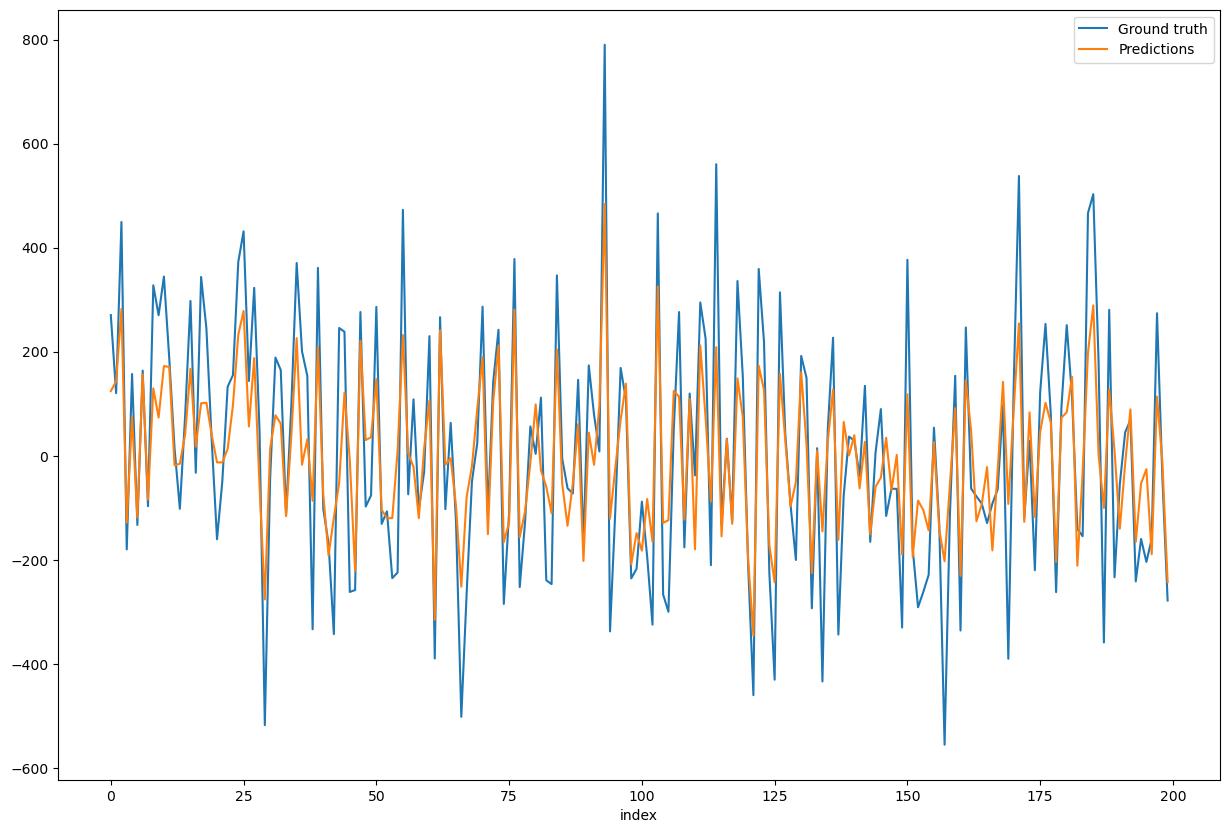

In [82]:
# Visualización

check.reset_index(inplace=True)

check.plot(x='index', y=['Ground truth', 'Predictions'], kind='line', figsize=(15, 10));